# Linear Models for Regression

## Import Modules

In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

# import graphviz
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression,make_friedman1

## Data

### Ex1：X_R1, y_R1

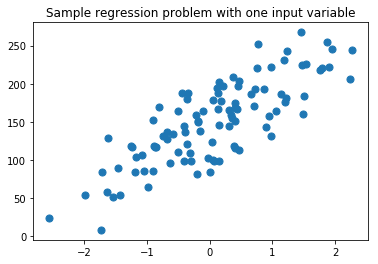

(100, 1)

In [20]:
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()
X_R1.shape

### Ex2: X_crime, y_crime

In [21]:
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    crime.head()
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]
    crime = crime.iloc[:,columns_to_keep].dropna()
    crime.head()
    X_crime = crime.iloc[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)

In [23]:
(X_crime, y_crime) = load_crime_dataset()
X_crime.shape

(1994, 88)

In [25]:
X_crime.columns[:10]

Index(['population', 'householdsize', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage'],
      dtype='object')

In [26]:
col_set1 = [x for x in X_crime.columns if x.startswith('Pct')]
col_set1[:5]

['PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed']

### Ex3: X_F1, y_F1

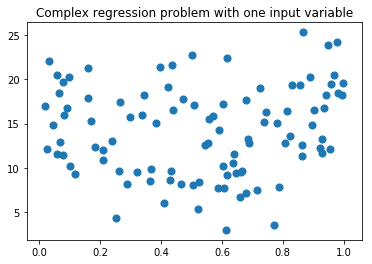

In [55]:
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# Linear Regression

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


## Linear Regression-EX1

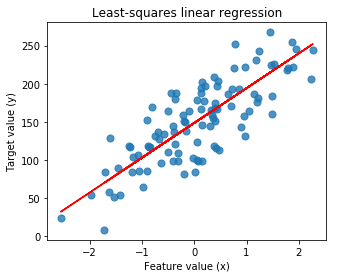

In [9]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8) #真实值
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-') # 拟合值
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

## Linear Regression-EX2

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306726073476
linear model coeff:
[  1.61892346e-03  -9.43009110e+01   1.36067510e+01  -3.13380670e+01
  -8.15482721e-02  -1.69455128e+01  -2.42730375e-03   1.53013232e+00
  -1.39193248e-02  -7.72112833e+00   2.28112354e+01  -5.65708295e+00
   9.34751364e+00   2.06969566e-01  -7.43413626e+00   9.65856476e-03
   4.38030290e-03   4.79754625e-03  -4.46469212e+00  -1.60907140e+01
   8.82778012e+00  -5.06734503e-01  -1.42198055e+00   8.17551991e+00
  -3.87048268e+00  -3.54209213e+00   4.48758304e+00   9.30645715e+00
   1.73644996e+02   1.18220766e+01   1.51120836e+02  -3.29613007e+02
  -1.35343395e+02   6.95380108e-01  -2.38369008e+01   2.77038981e+00
   3.82248925e-01   4.38813358e+00  -1.06410851e+01  -4.92294176e-03
   4.14031827e+01  -1.16206866e-03   1.18568968e+00   1.75418465e+00
  -3.68283678e+00   1.59679443e+00  -8.42180230e+00  -3.79703897e+01
   4.74076990e+01  -2.50768374e+01  -2.88246410e-01  -3.65633234e+01
   1.89516080e+01  -4.533

# Ridge Regression

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)
linridge
print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: -3352.423035846215
ridge regression linear model coeff:
[  1.95091438e-03   2.19322667e+01   9.56286607e+00  -3.59178973e+01
   6.36465325e+00  -1.96885471e+01  -2.80715856e-03   1.66254486e+00
  -6.61426604e-03  -6.95450680e+00   1.71944731e+01  -5.62819154e+00
   8.83525114e+00   6.79085746e-01  -7.33614221e+00   6.70389803e-03
   9.78505502e-04   5.01202169e-03  -4.89870524e+00  -1.79270062e+01
   9.17572382e+00  -1.24454193e+00   1.21845360e+00   1.03233089e+01
  -3.78037278e+00  -3.73428973e+00   4.74595305e+00   8.42696855e+00
   3.09250005e+01   1.18644167e+01  -2.05183675e+00  -3.82210450e+01
   1.85081589e+01   1.52510829e+00  -2.20086608e+01   2.46283912e+00
   3.29328703e-01   4.02228467e+00  -1.12903533e+01  -4.69567413e-03
   4.27046505e+01  -1.22507167e-03   1.40795790e+00   9.35041855e-01
  -3.00464253e+00   1.12390514e+00  -1.82487653e+01  -1.54653407e+01
   2.41917002e+01  -1.32497562e+01  -4.20113118e-01  -3.59710

## Ridge regression with feature normalization

In [30]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

# standarization 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.3906385044161
ridge regression linear model coeff:
[  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539   95.24316483 -330.61044265 -442.30179004
 -284.49744001 -258.37150609   17.66431072 -101.70717151  110.64762887
  523.13611718   24.8208959     4.86533322  -30.46775619   -3.51753937
   50.57947231   10.84840601   18.27680946   44.11189865   58.33588176
   67.08698975  -57.93524659  116.1446052    53.81163718   49.01607711
   -7.62262031   55.14288543  -52.08878272  123.39291017   77.12562171
   45.49795317  184.91229771  -91.3572

## Ridge regression with regularization parameter: alpha

In [31]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.50

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



D:\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0961258125619105e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


## RidgeCV()

In [1]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston.data.shape

(506, 13)

In [4]:
X,y = boston.data, boston.target

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [12]:
boston.target[:10]

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,  18.9])

In [14]:
from sklearn.linear_model import LassoCV
# We use the base estimator LassoCV since the L1 norm promotes sparsity of features
clflassocv = LassoCV()
clflassocv

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [17]:
# Set a minimum threshold of 0.25
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(clflassocv, threshold=0.25)
sfm.fit(X, y)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False),
        prefit=False, threshold=0.25)

In [19]:
n_features = sfm.transform(X).shape[1]
n_features

5

In [25]:
# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

print(n_features, sfm.threshold)

2 0.7499999999999999


In [21]:
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]

# Lasso Regression

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))

Crime dataset
lasso regression linear model intercept: 1186.6120619985786
lasso regression linear model coeff:
[    0.             0.            -0.          -168.18346054    -0.            -0.
     0.           119.6938194      0.            -0.             0.
  -169.67564456    -0.             0.            -0.             0.             0.
     0.            -0.            -0.             0.            -0.             0.
     0.           -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.             0.            -0.
 -1188.7396867     -0.            -0.            -0.          -231.42347299
     0.          1488.36512229     0.            -0.            -0.            -0.
     0.             0.             0.             0.             0.            -0.
     0.            20.14419415     0.             0.             0.             0.
     0.           339.04468804     0.             0.           459.53799903
    -0.             

In [34]:
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted(list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

# list(X_crime)列出所有列名

	PctKidsBornNeverMar, 1488.365
	PctKids2Par, -1188.740
	HousVacant, 459.538
	PctPersDenseHous, 339.045
	NumInShelters, 264.932
	MalePctDivorce, 259.329
	PctWorkMom, -231.423
	pctWInvInc, -169.676
	agePct12t29, -168.183
	PctVacantBoarded, 122.692
	pctUrban, 119.694
	MedOwnCostPctIncNoMtg, -104.571
	MedYrHousBuilt, 91.412
	RentQrange, 86.356
	OwnOccHiQuart, 73.144
	PctEmplManu, -57.530
	PctBornSameState, -49.394
	PctForeignBorn, 23.449
	PctLargHouseFam, 20.144
	PctSameCity85, 5.198


In [40]:
list(X_crime)[:5]

['population', 'householdsize', 'agePct12t21', 'agePct12t29', 'agePct16t24']

In [41]:
list(zip(list(X_crime), linlasso.coef_))[:10]

[('population', 0.0),
 ('householdsize', 0.0),
 ('agePct12t21', -0.0),
 ('agePct12t29', -168.18346054422776),
 ('agePct16t24', -0.0),
 ('agePct65up', -0.0),
 ('numbUrban', 0.0),
 ('pctUrban', 119.69381940226305),
 ('medIncome', 0.0),
 ('pctWWage', -0.0)]

In [42]:
list(zip(list(X_crime), linlasso.coef_))[3][1]

-168.18346054422776

In [47]:
sorted(list(zip(list(X_crime), linlasso.coef_)), key= lambda x: -abs(x[1]))[:21]

[('PctKidsBornNeverMar', 1488.3651222865146),
 ('PctKids2Par', -1188.7396867043215),
 ('HousVacant', 459.53799903358509),
 ('PctPersDenseHous', 339.04468804185274),
 ('NumInShelters', 264.93206554567274),
 ('MalePctDivorce', 259.32889225996206),
 ('PctWorkMom', -231.42347299198713),
 ('pctWInvInc', -169.67564456492511),
 ('agePct12t29', -168.18346054422776),
 ('PctVacantBoarded', 122.69221825705178),
 ('pctUrban', 119.69381940226305),
 ('MedOwnCostPctIncNoMtg', -104.57143405478088),
 ('MedYrHousBuilt', 91.412022424339327),
 ('RentQrange', 86.356000416371174),
 ('OwnOccHiQuart', 73.143658559722013),
 ('PctEmplManu', -57.52991965779475),
 ('PctBornSameState', -49.393551878306916),
 ('PctForeignBorn', 23.448864495368902),
 ('PctLargHouseFam', 20.144194150327824),
 ('PctSameCity85', 5.1977536921898295),
 ('population', 0.0)]

In [48]:
sorted(list(zip(list(X_crime), linlasso.coef_)), key= lambda x: abs(x[1]), reverse=True)[:21]

[('PctKidsBornNeverMar', 1488.3651222865146),
 ('PctKids2Par', -1188.7396867043215),
 ('HousVacant', 459.53799903358509),
 ('PctPersDenseHous', 339.04468804185274),
 ('NumInShelters', 264.93206554567274),
 ('MalePctDivorce', 259.32889225996206),
 ('PctWorkMom', -231.42347299198713),
 ('pctWInvInc', -169.67564456492511),
 ('agePct12t29', -168.18346054422776),
 ('PctVacantBoarded', 122.69221825705178),
 ('pctUrban', 119.69381940226305),
 ('MedOwnCostPctIncNoMtg', -104.57143405478088),
 ('MedYrHousBuilt', 91.412022424339327),
 ('RentQrange', 86.356000416371174),
 ('OwnOccHiQuart', 73.143658559722013),
 ('PctEmplManu', -57.52991965779475),
 ('PctBornSameState', -49.393551878306916),
 ('PctForeignBorn', 23.448864495368902),
 ('PctLargHouseFam', 20.144194150327824),
 ('PctSameCity85', 5.1977536921898295),
 ('population', 0.0)]

## Lasso regression with regularization parameter: alpha

In [49]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30



# Polynomial Regression

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [  4.42036739   5.99661447   0.52894712  10.23751345   6.5507973
  -2.02082636  -0.32378811]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722


In [57]:
print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))


Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[  3.40951018e-12   1.66452443e+01   2.67285381e+01  -2.21348316e+01
   1.24359227e+01   6.93086826e+00   1.04772675e+00   3.71352773e+00
  -1.33785505e+01  -5.73177185e+00   1.61813184e+00   3.66399592e+00
   5.04513181e+00  -1.45835979e+00   1.95156872e+00  -1.51297378e+01
   4.86762224e+00  -2.97084269e+00  -7.78370522e+00   5.14696078e+00
  -4.65479361e+00   1.84147395e+01  -2.22040650e+00   2.16572630e+00
  -1.27989481e+00   1.87946559e+00   1.52962716e-01   5.62073813e-01
  -8.91697516e-01  -2.18481128e+00   1.37595426e+00  -4.90336041e+00
  -2.23535458e+00   1.38268439e+00  -5.51908208e-01  -1.08795007e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805



In [58]:
print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(poly deg 2 + ridge) linear model coeff (w):
[ 0.          2.229281    4.73349734 -3.15432089  3.8585194   1.60970912
 -0.76967054 -0.14956002 -1.75215371  1.5970487   1.37080607  2.51598244
  2.71746523  0.48531538 -1.9356048  -1.62914955  1.51474518  0.88674141
  0.26141199  2.04931775 -1.93025705  3.61850966 -0.71788143  0.63173956
 -3.16429847  1.29161448  3.545085    1.73422041  0.94347654 -0.51207219
  1.70114448 -1.97949067  1.80687548 -0.2173863   2.87585898 -0.89423157]
(poly deg 2 + ridge) linear model intercept (b): 5.418
(poly deg 2 + ridge) R-squared score (training): 0.826
(poly deg 2 + ridge) R-squared score (test): 0.825
